In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Data_Kuesioner.csv')
dataset

,Nama,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,Maulana Arif Wijaya,4,5,5,3,5,4,1,1,5,...,5,2,1,5,2,3,3,5,5,5
1,SITI ROFIDATUS SAIDAH,3,4,4,2,4,5,5,4,5,...,4,4,5,4,5,5,4,4,5,3
2,FITRI ZAHROTUN NABILAH,1,1,1,2,1,1,2,3,2,...,4,4,4,3,4,3,4,4,4,4
3,ANA KHOIRIYAH SALSABILA,4,5,3,3,1,1,5,3,5,...,3,1,4,4,4,3,4,4,5,3
4,THARISA SABRINA,1,4,1,1,1,3,1,1,4,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MUHAMMAD RIZKY HAKSONO,1,2,3,3,4,5,4,2,4,...,5,4,5,3,2,2,4,3,4,4
96,AULIA SAVITRI,1,3,4,1,4,4,3,2,4,...,5,4,5,3,3,4,5,4,5,5
97,SHILVIANA DWI FITDYAWATI,2,3,4,1,4,5,2,2,2,...,5,4,4,5,2,2,5,4,5,5
98,INTAN KRISTINA PERMATASARI,2,1,2,3,4,4,3,3,3,...,5,3,4,4,3,3,5,4,5,4


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    100 non-null    object
 1   Q1      100 non-null    int64 
 2   Q2      100 non-null    int64 
 3   Q3      100 non-null    int64 
 4   Q4      100 non-null    int64 
 5   Q5      100 non-null    int64 
 6   Q6      100 non-null    int64 
 7   Q7      100 non-null    int64 
 8   Q8      100 non-null    int64 
 9   Q9      100 non-null    int64 
 10  Q10     100 non-null    int64 
 11  Q11     100 non-null    int64 
 12  Q12     100 non-null    int64 
 13  Q13     100 non-null    int64 
 14  Q14     100 non-null    int64 
 15  Q15     100 non-null    int64 
 16  Q16     100 non-null    int64 
 17  Q17     100 non-null    int64 
 18  Q18     100 non-null    int64 
 19  Q19     100 non-null    int64 
 20  Q20     100 non-null    int64 
dtypes: int64(20), object(1)
memory usage: 16.5+ KB


In [4]:
X1 = dataset[{'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19'}].values
Y1 = dataset[{'Q20'}].values

In [5]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.1, random_state=0)

In [6]:
regressor1 = LinearRegression()
regressor1.fit(X1_train, Y1_train)

LinearRegression()

In [7]:
print(regressor1.intercept_)

[3.60601591]


In [8]:
print(regressor1.coef_.transpose())

[[-0.08439037]
 [ 0.03241448]
 [-0.04898141]
 [-0.04457103]
 [-0.15191659]
 [ 0.02854309]
 [ 0.02205966]
 [-0.18933522]
 [ 0.0999232 ]
 [-0.00039783]
 [ 0.21388572]
 [-0.25386676]
 [ 0.11029909]
 [ 0.06268084]
 [ 0.03243798]
 [ 0.03072319]
 [-0.01776761]
 [-0.13878186]
 [ 0.18163638]]


In [23]:
coeff_df= pd.DataFrame(regressor1.coef_.transpose(),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13'
                                                     ,'Q14','Q15','Q16','Q17','Q18','Q19'], columns = ['Coefficient'])
coeff_df

,Coefficient
Q1,-0.084390
Q2,0.032414
Q3,-0.048981
Q4,-0.044571
Q5,-0.151917
Q6,0.028543
Q7,0.022060
Q8,-0.189335
Q9,0.099923
Q10,-0.000398


In [9]:
y1_pred = regressor1.predict(X1_test)

In [10]:
pred_df = pd.DataFrame(y1_pred,columns = ['Predicted'])
act_df = pd.DataFrame(Y1_test, columns =['Actual'])
df= pd.concat([act_df,pred_df],axis=1)
df

,Actual,Predicted
0,3,3.784475
1,3,3.850685
2,4,3.841547
3,3,3.540489
4,4,3.920705
5,5,4.304600
6,3,2.300145
7,4,4.659344
8,4,3.467485
9,4,4.078768


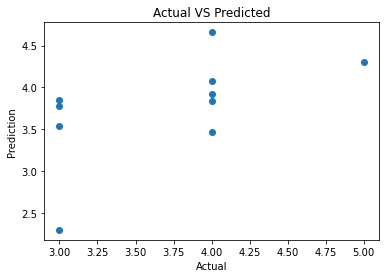

In [19]:
plt.scatter(Y1_test,y1_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Actual VS Predicted")
plt.show()

In [21]:
print('MAE : ',metrics.mean_absolute_error(Y1_test,y1_pred))
print('MSE : ',metrics.mean_squared_error(Y1_test,y1_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(Y1_test,y1_pred)))

MAE :  0.5079278649089567
MSE :  0.3360478174856002
RMSE :  0.5796963148801277
